In [27]:
y.dtypes
y['prognosis'].dtypes

CategoricalDtype(categories=['Chikungunya', 'Dengue', 'Japanese_encephalitis',
                  'Lyme_disease', 'Malaria', 'Plague', 'Rift_Valley_fever',
                  'Tungiasis', 'West_Nile_fever', 'Yellow_Fever', 'Zika'],
, ordered=False)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


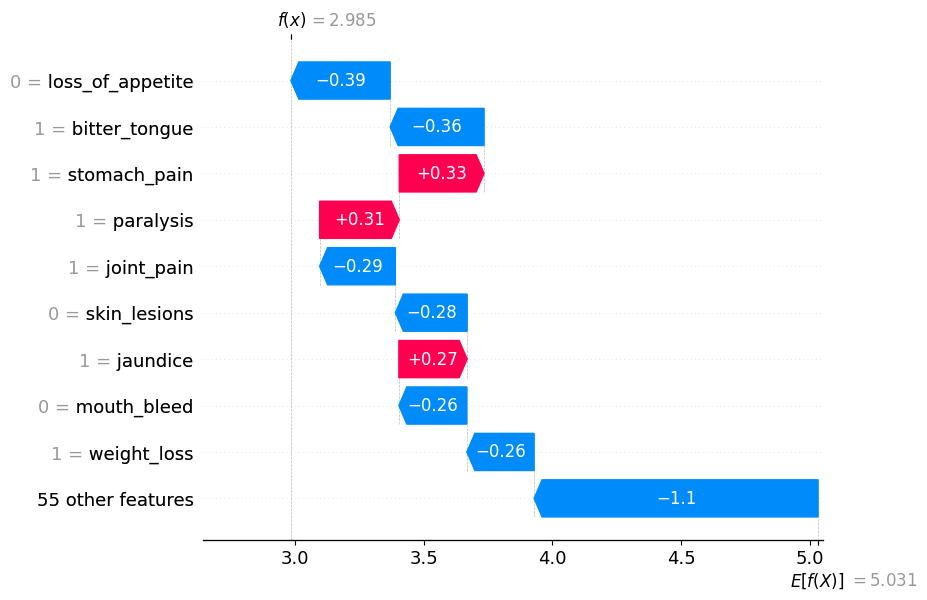

In [42]:
import pandas as pd
import xgboost
import shap
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv('data/train.csv')
X = pd.DataFrame(train.drop(columns=['id','prognosis']))
y = pd.DataFrame(train['prognosis']).values.ravel()

# create a label encoder object and fit it to the categories in 'y'
enc = LabelEncoder()
enc.fit(y)
y_encoded = enc.transform(y)
y_encoded = y_encoded.ravel()

# train an XGBoost model
model = xgboost.XGBRegressor(n_estimators=100).fit(X, y_encoded)

# explain the model's predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])


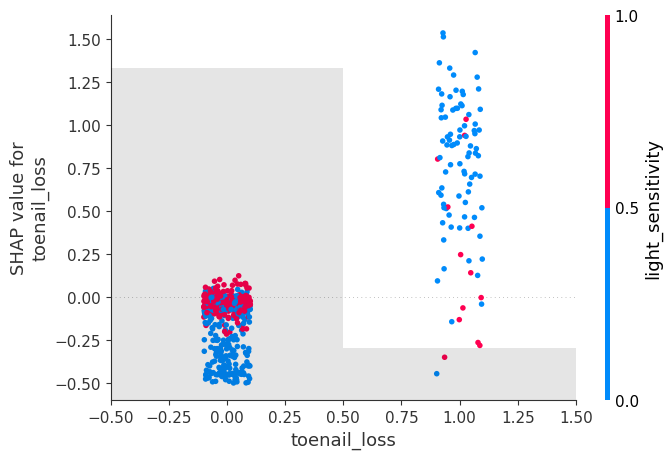

In [52]:
import shap
import pandas as pd

# assuming you already have the SHAP values in `shap_values` variable
X = pd.read_csv('your_data.csv')  # replace 'your_data.csv' with your actual data file name
toenail_loss_col_index = X.columns.get_loc('toenail_loss')

feature_names = list(X.columns)
feature_names.remove('toenail_loss')

shap_values_for_toenail_loss = shap_values[:, toenail_loss_col_index]
shap_values_for_other_features = shap_values[:, feature_names]

shap.scatterplot(shap_values_for_other_features, shap_values_for_toenail_loss, feature_names)


In [49]:
shap.initjs()
shap.plots.force(shap_values, matplotlib=False)



No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


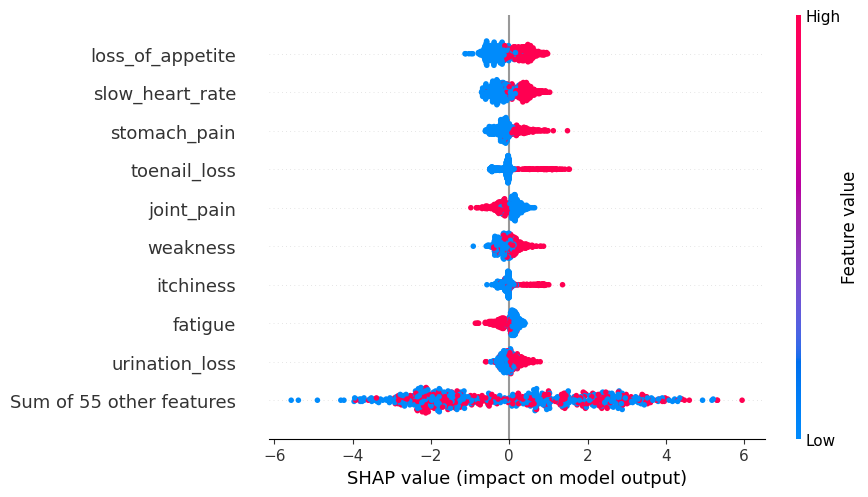

In [50]:
shap.plots.beeswarm(shap_values)

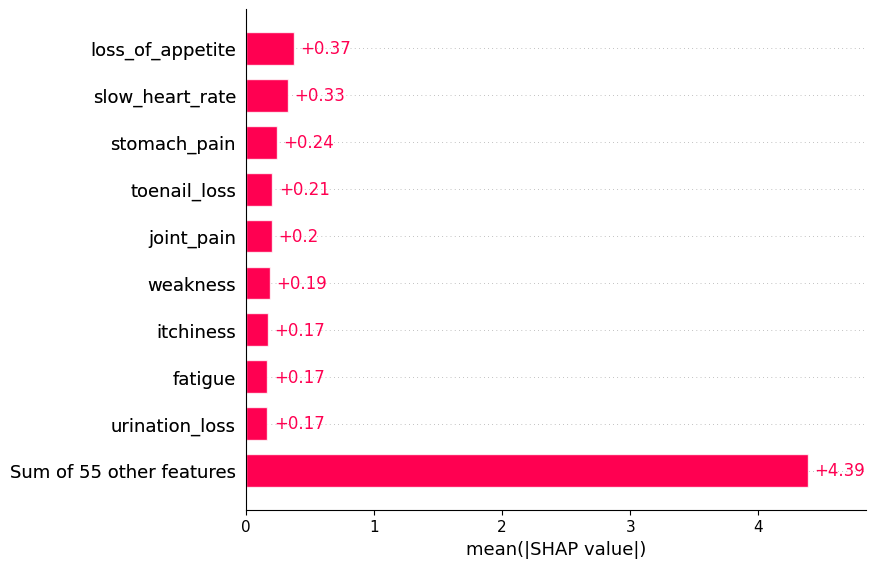

In [51]:
shap.plots.bar(shap_values)